In [49]:
import numpy
import collections
from tensorflow.python.framework import dtypes

from os import listdir
import os
from os.path import isfile, join
import numpy as np
import cv2

import matplotlib.pylab as plt
%matplotlib inline

from __future__ import division
from __future__ import print_function

import argparse
import sys

import glob
import param
import time

import tensorflow as tf

In [2]:
###From https://gist.github.com/ambodi/408301bc5bc07bc5afa8748513ab9477#file-dataset-py-L74

In [3]:
###Data from  https://www.kaggle.com/c/dogs-vs-cats/data

## Saving raw data to npy

#### Load data

In [5]:
#path to directory
path_train = 'raw_data/train/'
path_test = 'raw_data/test/'
img_size= 100

#get folder names
def directory_scan(path):
    dirlist = [ item for item in os.listdir(path) if os.path.isdir(os.path.join(path, item)) ]
    return dirlist

#build labels and image arrays, resize image to 100*100
def read_images_in_folder(dirlist, path):
    images=[]
    labels = []
    count = 0
    for i in range(len(dirlist)):
        image_stack = []
        for img in glob.glob(path+dirlist[i]+'/*jpg'):
            count=count+1
            labels.append(dirlist[i])
            IMG = cv2.imread(img)
            #RGB to grey scale
            IMG_2= cv2.cvtColor( IMG, cv2.COLOR_RGB2GRAY )
            #resize to 100*100
            im_resize = cv2.resize(IMG_2, (img_size, img_size), interpolation=cv2.INTER_CUBIC)
            images.append(im_resize)
        #np_images = np.array(image_stack)
        
    return images, labels, count

if __name__ == '__main__':
    dirlist_train = directory_scan(path_train)
    images_train,labels_train,count_train = read_images_in_folder(dirlist_train, path_train)
    dirlist_test = directory_scan(path_test)
    images_test,labels_test,count_test = read_images_in_folder(dirlist_test, path_test)

#save to file
np.save('npy/images_train',images_train)
np.save('npy/labels_train',labels_train)
np.save('npy/images_test',images_test)
np.save('npy/labels_test',labels_test)

print('There are '+ str(count_train) +' training images')
print('There are '+ str(count_test) +' testing images')

nb_img_train = count_train
nb_img_test = count_test

There are 16128 training images
There are 720 testing images


#### Load NPY data

In [4]:
#LOAD TRAIN
#load images
train_images = np.load('npy/images_train.npy')

#load labels
train_labels = np.load('npy/labels_train.npy')

#LOAD TEST
#load images
test_images = np.load('npy/images_test.npy')

#load labels
test_labels = np.load('npy/labels_test.npy')

img_size=100

bed


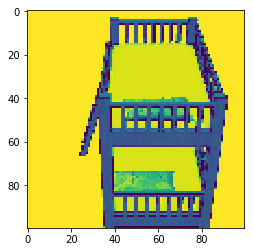

In [5]:
index = 50
print(train_labels[index])
plt.imshow(train_images[index])

In [6]:
path_train = 'raw_data/train/'
path_test = 'raw_data/test/'
img_size= 100

#get folder names
def directory_scan(path):
    dirlist = [ item for item in os.listdir(path) if os.path.isdir(os.path.join(path, item)) ]
    return dirlist

dirlist_train = directory_scan(path_train)
dirlist_test = directory_scan(path_test)

nb_img_train = len(train_images)
nb_img_test = len(test_images)

In [21]:
#prepare and reshape testing/training sets
#img_size = 100
#nb_img_train = 1400
#nb_img_test = 40

train_img = train_images.reshape((nb_img_train, img_size * img_size))
train_img = train_img.astype('float32') / 255

test_img = test_images.reshape([-1,img_size,img_size,1])
test_img = test_img.astype('float32') / 255

In [23]:
test_img.shape

(720, 100, 100, 1)

#### One Hot Encoding of Labels

In [8]:
#LABEL ONE HOT ENCODING
#Training
k=0
for i in range(len(dirlist_train)):
    for j in range(len(train_labels)):
        if(train_labels[j]==dirlist_train[i]):
            train_labels[j]=k
    k=k+1

#Testing
m=0
for l in range(len(dirlist_test)):
    for h in range(len(test_labels)):
        if(test_labels[h]==dirlist_test[l]):
            test_labels[h]=m
    m=m+1

In [9]:
from keras.utils import to_categorical

train_lab= to_categorical(train_labels)
test_lab = to_categorical(test_labels)

C:\Users\TempUser\Anaconda3\envs\tensorflow_1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Neural Net Model

In [19]:
from keras import models
from keras import layers

#initializes the model
network = models.Sequential()

#BUILD COMPUTATIONAL GRAPH
network.add(layers.Dense(200, activation='relu', input_shape=(100 * 100,)))

network.add(layers.Dense(300, activation='relu'))

network.add(layers.Dense(400, activation='relu'))

network.add(layers.Dense(len(dirlist_train), activation='softmax'))

#SETS PERFORMANCE METRICS
#network.compile(optimizer='Adam',
 #               loss='categorical_crossentropy',
  #              metrics=['accuracy'])

network.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#Run model
network.fit(train_img, train_lab, epochs=50, batch_size=800, shuffle=True)

Epoch 1/50
16128/16128 [==============================] - 3s 205us/step - loss: 2.8824 - acc: 0.2202
Epoch 2/50
16128/16128 [==============================] - 3s 164us/step - loss: 1.6789 - acc: 0.3792
Epoch 3/50
16128/16128 [==============================] - 3s 165us/step - loss: 1.4874 - acc: 0.4649
Epoch 4/50
16128/16128 [==============================] - 3s 166us/step - loss: 1.4215 - acc: 0.4929
Epoch 5/50
16128/16128 [==============================] - 3s 174us/step - loss: 1.3427 - acc: 0.5231
Epoch 6/50
16128/16128 [==============================] - 3s 170us/step - loss: 1.2956 - acc: 0.5367
Epoch 7/50
16128/16128 [==============================] - 3s 169us/step - loss: 1.2646 - acc: 0.5490
Epoch 8/50
16128/16128 [==============================] - 3s 184us/step - loss: 1.2127 - acc: 0.5691
Epoch 9/50
16128/16128 [==============================] - 3s 174us/step - loss: 1.1792 - acc: 0.5810
Epoch 10/50
16128/16128 [==============================] - 3s 186us/step - loss: 1.1706 - a

In [20]:
test_loss, test_acc = network.evaluate(test_img, test_lab)

720/720 [==============================] - 0s 153us/step


In [21]:
print('test_acc:', test_acc, 'test_loss', test_loss)

test_acc: 0.7069444444444445 test_loss 0.8313100185659197


## Convolutional Model

In [10]:
# Learning Tensorflow, O'Reilly, Convolutional Neural Network, p. 63

#### Helper Function Defintion

In [10]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def next_batch_(num, data, labels):

    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = data[idx]
    labels_shuffle = labels[idx]
    labels_shuffle = np.asarray(labels_shuffle.values.reshape(len(labels_shuffle), 1))

    return data_shuffle, labels_shuffle

In [46]:
#sets couple of functions
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial=tf.constant(0.1,shape=shape)
    return tf.Variable(initial)
    
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')

def conv_layer(input_,shape):
    W=weight_variable(shape)
    b=bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input_,W)+b)

def full_layer(input_,size):
    in_size=int(input_.get_shape()[1])
    W=weight_variable([in_size,size])
    b= bias_variable([size])
    return tf.matmul(input_,W)+b

def Plot_accuracy(train_acc, Title):
    x = [i for i in range(0, len(train_acc))]
    y= train_acc
    plt.plot(x,y)
    plt.ylabel('Accuracy')
    plt.xlabel('Steps')
    plt.xticks(x)
    plt.ylim(ymax=1)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.grid(True)
    plt.title(Title)
    plt.show()

#### Set Parameters

#### Computational Graph Definition

In [ ]:
x_image = train_images.reshape([len(train_images) , img_size , img_size , 1])

In [28]:
x = tf.placeholder(tf.float32, shape=[None, img_size,img_size,1])
y_ = tf.placeholder(tf.float32, shape=[None,len(dirlist_train)])

#x_image = tf.reshape(x, [50 , img_size , img_size , 1])

#first conv layer
#INPUT images >> (len(train_images),100,100,1)
conv1= conv_layer(x, shape=[5,5,1,100]) #shape [kernel height, kernel width, nb of chanels in images, nb of output layers]
conv1_pool= max_pool_2x2(conv1)
#OUTPUT images >> (100,50,50)

#second conv layer
#INPUT images >> (100,50,50)
conv2= conv_layer(conv1_pool, shape=[5,5,100,200])
conv2_pool= max_pool_2x2(conv2)
#OUTPUT images >> (200,25,25)

#fully connected layer
#INPUT images >> (200,25,25) >> reshape to 200*25*25 >> 125000
conv2_flat = tf.reshape(conv2_pool, [-1,125000])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1000))
#OUTPUT images >> (-1,1000)

#dropout layer
keep_prob=tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, len(dirlist_train))

step 0, training accuracy 0.10000000149011612
step 5, training accuracy 0.3799999952316284
step 10, training accuracy 0.3799999952316284
step 15, training accuracy 0.23999999463558197
step 20, training accuracy 0.47999998927116394
step 25, training accuracy 0.4399999976158142
step 30, training accuracy 0.47999998927116394
step 35, training accuracy 0.5799999833106995
step 40, training accuracy 0.5
step 45, training accuracy 0.41999998688697815
step 50, training accuracy 0.36000001430511475
step 55, training accuracy 0.41999998688697815
step 60, training accuracy 0.5199999809265137
step 65, training accuracy 0.46000000834465027
step 70, training accuracy 0.4399999976158142
step 75, training accuracy 0.5400000214576721
step 80, training accuracy 0.5199999809265137
step 85, training accuracy 0.5600000023841858
step 90, training accuracy 0.46000000834465027
step 95, training accuracy 0.5600000023841858
step 100, training accuracy 0.41999998688697815
step 105, training accuracy 0.5799999833

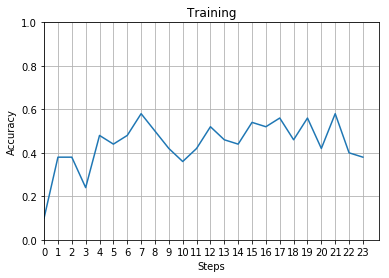

Execution time = 16 min 7.567670822143555 sec


In [61]:
STEPS= 120

train_acc = []

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels = y_))

train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#calculate running time
start = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(STEPS):
        
        batch_img, batch_label = next_batch(50,x_image,train_lab)
        
        if i%5==0:
            train_accuracy = sess.run(accuracy, feed_dict={x: batch_img, y_: batch_label, keep_prob: 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))
            train_acc.append(train_accuracy)
            
        sess.run(train_step, feed_dict={x: batch_img, y_: batch_label, keep_prob: 0.5})
        
    X = test_img
    Y = test_lab
    test_accuracy = np.mean([sess.run(accuracy, feed_dict={x:X , y_:Y, keep_prob: 1.0})]) #for i in range(len(dirlist_train))])

#calculate running time
stop = time.time()

#Extract performance metrics
print('test accuracy: {}'.format(test_accuracy))
Plot_accuracy(train_acc, "Training")
print("Execution time = " + str(int(((stop-start)-(stop-start)%60)/60)) +" min "+str((stop-start)%60)+" sec")